# Project 3 - Mushroom Data & Analytics

Group  

Vicky Ke & Cerina Liu & Jianying Zhu

05/16/2021

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, exhaustive_search
from dmba import classificationSummary, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
import statsmodels.formula.api as sm
from time import perf_counter
from tabulate import tabulate
import random
import tkinter
import matplotlib

import warnings 
warnings.filterwarnings('ignore')


## 1. Describe dataset

In [2]:
# data from Kaggle: https://www.kaggle.com/uciml/mushroom-classification
ms = pd.read_csv("mushrooms.csv")
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,n,f,n,f,w,b,k,...,f,w,w,p,w,o,e,k,s,g
1,e,x,f,n,t,n,f,c,b,w,...,s,g,g,p,w,o,p,n,v,d
2,e,x,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,n,v,d
3,e,f,s,n,f,n,f,w,b,k,...,f,w,w,p,w,o,e,k,a,g
4,e,x,f,n,t,n,f,c,b,w,...,s,g,g,p,w,o,p,k,y,d


### 1.1 Data feature 

In [3]:
ms.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [4]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6125 non-null   object
 1   cap-shape                 6125 non-null   object
 2   cap-surface               6125 non-null   object
 3   cap-color                 6125 non-null   object
 4   bruises                   6125 non-null   object
 5   odor                      6125 non-null   object
 6   gill-attachment           6125 non-null   object
 7   gill-spacing              6125 non-null   object
 8   gill-size                 6125 non-null   object
 9   gill-color                6125 non-null   object
 10  stalk-shape               6125 non-null   object
 11  stalk-root                6125 non-null   object
 12  stalk-surface-above-ring  6125 non-null   object
 13  stalk-surface-below-ring  6125 non-null   object
 14  stalk-color-above-ring  

### 1.2 null value check

In [5]:
#check errors
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 1.3 Data exploration

In [6]:
ms.shape

(6125, 23)

In [7]:
t1=ms.iloc[:,0:-1].describe()
t1
#t2=t1[t1['std']>1]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
count,6125,6125,6125,6125,6125,6125,6125,6125,6125,6125,...,6125,6125,6125,6125,6125,6125,6125,6125,6125,6125
unique,2,5,4,10,2,9,2,2,2,12,...,4,4,9,9,1,4,3,5,8,6
top,p,x,y,n,f,n,f,c,b,b,...,s,s,w,w,p,w,o,p,w,v
freq,3679,2598,2632,1688,3961,2557,5915,5597,4039,1728,...,3525,3472,2597,2513,6125,5925,5489,2660,2388,3678


In [8]:
#sns.heatmap(ms.corr())

## 2. Visualization

## 3. Train Test Split

In [9]:
X = ms.iloc[:,1:23]
y = ms.iloc[:,[0]]

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for col in X.columns:
    X[col] = le.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,4,2,4,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,3,1
1,4,0,4,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,3,4,0
2,4,3,2,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,4,0
3,2,2,4,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,0,1
4,4,0,4,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,2,5,0


In [11]:
df=X
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,4,2,4,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,3,1
1,4,0,4,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,3,4,0
2,4,3,2,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,4,0
3,2,2,4,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,0,1
4,4,0,4,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
6121,4,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
6122,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
6123,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,6,4,2


In [12]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
print(X.shape)
print(y.shape)

(6125, 22)
(6125,)


## 3.1 Train-test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## 3.2 Standard Scaling¶

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.3  K-fold Cross validation for 7 models

In [16]:
models=[("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Gradient Boostin", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.9863 ± 0.0034
Decision Tree: 0.9998 ± 0.0006
Random Forest: 1.0000 ± 0.0000
Gradient Boostin: 0.9998 ± 0.0006
KNeighbors: 0.9980 ± 0.0020
SVM: 0.9988 ± 0.0014
Naive Bayes: 0.9598 ± 0.0058


## 4. Original 7 Models with its test score, Confusion Matrix accuracy, recall, precision, and time.

In [17]:
def get_model_data(X_test,y_test,model,model_name):

    startTime = perf_counter()
    a = model.score(X_test,y_test)
    print("Test Score:",a)

    endTime = perf_counter()
    print()
    
    y_pred = cross_val_predict(model,X_test,y_test,cv=10)
    classificationSummary(y_test, y_pred)
    print()
    
    #y_pred_model = model.predict(X_test)
        
    rs = recall_score(y_test, y_pred,average=None)
    print("recall Score(y = 0):",rs[0])
    print("recall Score(y = 1):",rs[1])
    ps = precision_score(y_test, y_pred,average=None)
    print("precision Score(y = 0):",ps[0])
    print("precision Score(y = 1):",ps[1])
    

    b = round(np.mean(y_test-y_pred),4)
    c = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)
    d = round(metrics.mean_absolute_error(y_test, y_pred),4)

    print()
    print('Statistics')
    print('                     Mean Error (ME)  :',b)
    print('       Root Mean Squared Error (RMSE) :',c)
    print('            Mean Absolute Error (MAE) :',d)

    print()
    time = endTime-startTime
    print("Total time:",time)
    print()
    v = [model_name,round(a,3),round(rs[0],3),
        round(rs[1],3),round(ps[0],3),round(ps[1],3),b,c,d,round(time,3)]
    return v

In [18]:
 #all the models we used
lr = LogisticRegression(solver="liblinear").fit(X_train,y_train)
gnb = GaussianNB().fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)
tree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
rfc = RandomForestClassifier(n_estimators=100, random_state=42,verbose=False).fit(X_train,y_train)
gbmc = GradientBoostingClassifier(n_estimators=100, verbose=False).fit(X_train,y_train)
svm=SVC(random_state=42).fit(X_train,y_train)
models1 = [lr,gnb,knn,tree,rfc,gbmc,svm]

model_name = ["Logistic Regression","GaussianNB","KNeighbors Classifier",
             "Decision Tree Classifier","Random Forest Classifier",
             "Gradient Boosting Classifier","Support Vector Classifier"]

In [19]:
table_vector = []

In [20]:
from time import perf_counter
from sklearn.model_selection import cross_val_predict

-------------------------------
Logistic Regression
-------------------------------
Test Score: 0.9910204081632653

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual   0   1
     0 476  10
     1  12 727

recall Score(y = 0): 0.9794238683127572
recall Score(y = 1): 0.9837618403247632
precision Score(y = 0): 0.9754098360655737
precision Score(y = 1): 0.9864314789687924

Statistics
                     Mean Error (ME)  : 0.0016
       Root Mean Squared Error (RMSE) : 0.134
            Mean Absolute Error (MAE) : 0.018

Total time: 0.003164159000000666



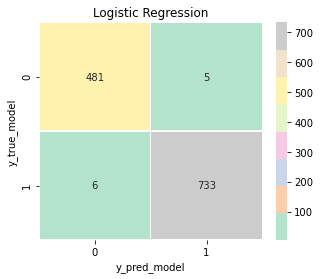

-------------------------------
GaussianNB
-------------------------------
Test Score: 0.9648979591836735

Confusion Matrix (Accuracy 0.9478)

       Prediction
Actual   0   1
     0 443  43
     1  21 718

recall Score(y = 0): 0.911522633744856
recall Score(y = 1): 0.9715832205683356
precision Score(y = 0): 0.9547413793103449
precision Score(y = 1): 0.9434954007884363

Statistics
                     Mean Error (ME)  : -0.018
       Root Mean Squared Error (RMSE) : 0.2286
            Mean Absolute Error (MAE) : 0.0522

Total time: 0.002290998999999516



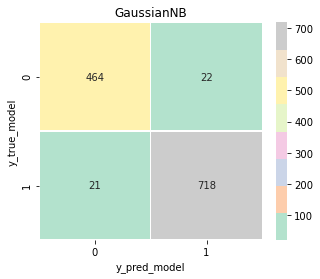

-------------------------------
KNeighbors Classifier
-------------------------------
Test Score: 0.9983673469387755

Confusion Matrix (Accuracy 0.9951)

       Prediction
Actual   0   1
     0 481   5
     1   1 738

recall Score(y = 0): 0.9897119341563786
recall Score(y = 1): 0.9986468200270636
precision Score(y = 0): 0.9979253112033195
precision Score(y = 1): 0.9932705248990579

Statistics
                     Mean Error (ME)  : -0.0033
       Root Mean Squared Error (RMSE) : 0.07
            Mean Absolute Error (MAE) : 0.0049

Total time: 0.14618914200000077



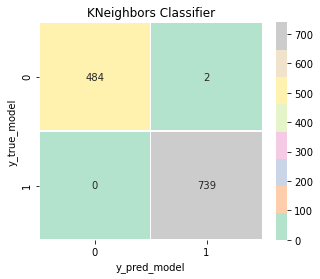

-------------------------------
Decision Tree Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9959)

       Prediction
Actual   0   1
     0 483   3
     1   2 737

recall Score(y = 0): 0.9938271604938271
recall Score(y = 1): 0.9972936400541272
precision Score(y = 0): 0.9958762886597938
precision Score(y = 1): 0.995945945945946

Statistics
                     Mean Error (ME)  : -0.0008
       Root Mean Squared Error (RMSE) : 0.0639
            Mean Absolute Error (MAE) : 0.0041

Total time: 0.0009695510000007346



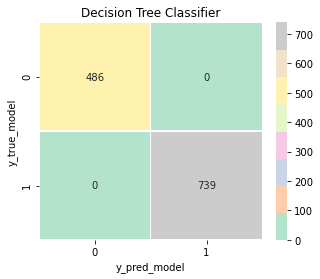

-------------------------------
Random Forest Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9967)

       Prediction
Actual   0   1
     0 484   2
     1   2 737

recall Score(y = 0): 0.9958847736625515
recall Score(y = 1): 0.9972936400541272
precision Score(y = 0): 0.9958847736625515
precision Score(y = 1): 0.9972936400541272

Statistics
                     Mean Error (ME)  : 0.0
       Root Mean Squared Error (RMSE) : 0.0571
            Mean Absolute Error (MAE) : 0.0033

Total time: 0.026261842000000257



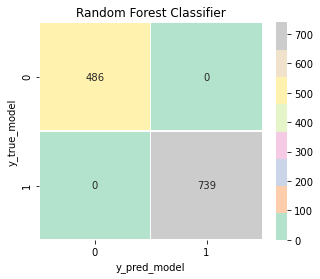

-------------------------------
Gradient Boosting Classifier
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 0.9935)

       Prediction
Actual   0   1
     0 484   2
     1   6 733

recall Score(y = 0): 0.9958847736625515
recall Score(y = 1): 0.9918809201623816
precision Score(y = 0): 0.9877551020408163
precision Score(y = 1): 0.9972789115646259

Statistics
                     Mean Error (ME)  : 0.0033
       Root Mean Squared Error (RMSE) : 0.0808
            Mean Absolute Error (MAE) : 0.0065

Total time: 0.00494228799999874



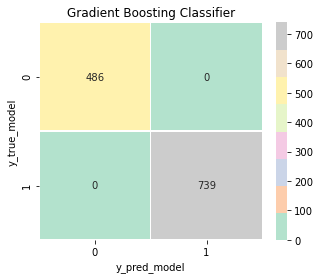

-------------------------------
Support Vector Classifier
-------------------------------
Test Score: 0.9991836734693877

Confusion Matrix (Accuracy 0.9943)

       Prediction
Actual   0   1
     0 482   4
     1   3 736

recall Score(y = 0): 0.9917695473251029
recall Score(y = 1): 0.9959404600811907
precision Score(y = 0): 0.9938144329896907
precision Score(y = 1): 0.9945945945945946

Statistics
                     Mean Error (ME)  : -0.0008
       Root Mean Squared Error (RMSE) : 0.0756
            Mean Absolute Error (MAE) : 0.0057

Total time: 0.01766345700000116



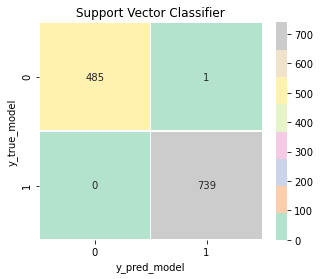

In [21]:
i=0

for model in models1:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(X_test,y_test,model,model_name[i])
    table_vector.append(v)
    y_pred_model = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_model)
    f, ax = plt.subplots(figsize =(5,4))
    sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_model")
    plt.ylabel("y_true_model")
    plt.title(model_name[i])
    plt.show()
    i=i+1

In [22]:
results = pd.DataFrame(data=table_vector,columns=['Model','Test Score','Recall(0)',
              'Recall(1)','Precision(0)','Precision(1)','ME','RMSE','MAE','Time'])

results[['Model','Test Score',
         'Recall(0)','Recall(1)',
         'Precision(0)','Precision(1)',
         'MAE','RMSE','Time']]


,Model,Test Score,Recall(0),Recall(1),Precision(0),Precision(1),MAE,RMSE,Time
0,Logistic Regression,0.991,0.979,0.984,0.975,0.986,0.0180,0.1340,0.003
1,GaussianNB,0.965,0.912,0.972,0.955,0.943,0.0522,0.2286,0.002
2,KNeighbors Classifier,0.998,0.990,0.999,0.998,0.993,0.0049,0.0700,0.146
3,Decision Tree Classifier,1.000,0.994,0.997,0.996,0.996,0.0041,0.0639,0.001
4,Random Forest Classifier,1.000,0.996,0.997,0.996,0.997,0.0033,0.0571,0.026
5,Gradient Boosting Classifier,1.000,0.996,0.992,0.988,0.997,0.0065,0.0808,0.005
6,Support Vector Classifier,0.999,0.992,0.996,0.994,0.995,0.0057,0.0756,0.018


## Feature Importances

Text(0.5, 0, 'Decision Tree Feature Importance')

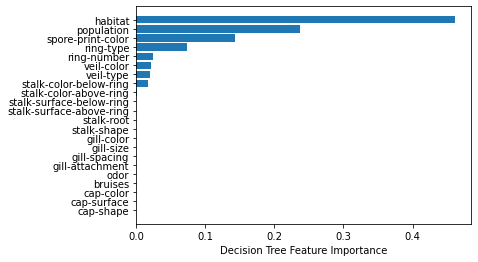

In [23]:
tree.feature_importances_
sorted_idx = tree.feature_importances_.argsort()
plt.barh(df.columns.tolist(), tree.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

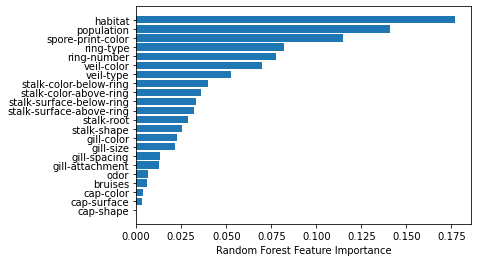

In [24]:
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns.tolist(), rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Gradient Boosting Feature Importance')

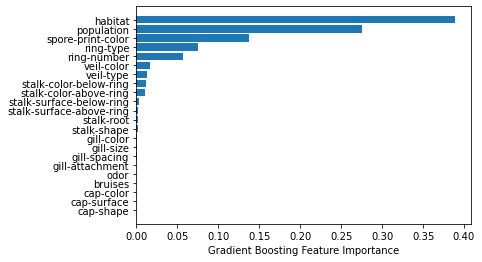

In [25]:
gbmc.feature_importances_
sorted_idx = gbmc.feature_importances_.argsort()
plt.barh(df.columns.tolist(), gbmc.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 5.PCA 7 models

In [26]:
#train test split after pca
X = StandardScaler().fit_transform(X)
pca1 = PCA()
pca1.fit_transform(X)

num_components1 = len(pca1.explained_variance_ratio_)
ind = np.arange(num_components1)
vals = pca1.explained_variance_ratio_
cumvals = np.cumsum(vals)

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca1.explained_variance_),
                           'Proportion of variance': pca1.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca1.explained_variance_ratio_)})

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['pca{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary.round(4)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
Standard deviation,2.1319,1.7679,1.6278,1.4297,1.1522,0.9979,0.9636,0.9110,0.8587,0.8006,...,0.7131,0.6295,0.5759,0.5290,0.4066,0.3526,0.3312,0.2555,0.2127,0.0
Proportion of variance,0.2164,0.1488,0.1262,0.0973,0.0632,0.0474,0.0442,0.0395,0.0351,0.0305,...,0.0242,0.0189,0.0158,0.0133,0.0079,0.0059,0.0052,0.0031,0.0022,0.0
Cumulative proportion,0.2164,0.3652,0.4914,0.5887,0.6519,0.6993,0.7435,0.7830,0.8181,0.8486,...,0.9277,0.9466,0.9624,0.9757,0.9836,0.9895,0.9947,0.9978,1.0000,1.0


In [27]:
#reduce deminsion to X only
num_components2 = len(cumvals[cumvals <= 0.80])
print(num_components2)

# return PCA with components that explain 80% of the variance
pca2 = PCA(n_components = num_components2, whiten=True)
principalcomponents = pca2.fit_transform(X)
np.cumsum(pca2.explained_variance_ratio_)

8


array([0.21639032, 0.36520336, 0.49136128, 0.58868056, 0.65188862,
       0.69930426, 0.74351163, 0.78302139])

In [28]:
pcaDF = pd.DataFrame(data = principalcomponents[:, 0:8], columns = pcaSummary.columns.tolist()[0:8])

In [29]:
y = pd.DataFrame(y)

In [30]:
#new dataset using PCA
mushroomPCA = pd.concat([pcaDF, y], axis = 1)
mushroomPCA.index += 1

In [31]:
mushroomPCA

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,0
1,-0.347405,0.401647,-0.034506,-1.560795,-1.698699,-1.438475,1.548996,-0.103604,0
2,-1.117084,-0.911650,-0.536616,0.116514,0.177556,-0.698660,-1.789954,-0.934744,0
3,-0.627884,-1.248587,-0.689238,0.219333,0.473269,-1.064653,-0.200009,0.776710,0
4,-0.238509,1.005762,0.870065,-1.881565,-1.257939,-0.346914,3.156693,-1.189891,0
5,-1.249720,-0.837674,-0.847814,0.210722,0.058745,-0.468526,-1.772023,-0.858113,0
...,...,...,...,...,...,...,...,...,...
6121,-0.711181,-0.696214,3.173387,3.231016,-0.791075,-1.252307,0.779102,-0.127252,0
6122,-0.894054,-0.679724,3.052077,4.694404,-1.749241,-1.481118,0.866196,-0.167911,0
6123,-0.473272,-0.506200,3.143128,3.307251,-0.719811,-0.304747,0.922969,-0.275537,0
6124,1.642855,-0.012793,-0.392759,0.202671,-0.161891,0.269950,0.104195,0.526003,1


In [32]:
mushroomPCA.rename(columns={0:'class'}, inplace=True)

In [33]:
print(mushroomPCA.columns)

Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'class'],
      dtype='object')


In [34]:
mushroomPCA.dtypes

pca1     float64
pca2     float64
pca3     float64
pca4     float64
pca5     float64
pca6     float64
pca7     float64
pca8     float64
class      int64
dtype: object

### 5.1 PCA train test split

In [35]:
# x and y value using pca
PCA_predictors = mushroomPCA
xPCA = PCA_predictors.drop('class',axis=1)
yPCA = mushroomPCA["class"]

In [36]:
#xPCA = mushroomPCA.drop('class',axis=1)
#yPCA = mushroomPCA["class"]
xTrain,xTest,yTrain,yTest = train_test_split(xPCA, yPCA, test_size=0.2,random_state=42)

In [37]:
lr = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knn = KNeighborsClassifier().fit(xTrain,yTrain)
tree = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(n_estimators=100, random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(n_estimators=100, verbose=False).fit(xTrain,yTrain)
svm=SVC(random_state=42).fit(xTrain,yTrain)
models = [lr,gnb,knn,tree,rfc,gbmc,svm]

model_name = ["Logistic Regression(PCA)","GaussianNB(PCA)","KNeighbors Classifier(PCA)",
             "Decision Tree Classifier(PCA)","Random Forest Classifier(PCA)",
             "Gradient Boosting Classifier(PCA)","Support Vector Classifier(PCA)"]

-------------------------------
Logistic Regression(PCA)
-------------------------------
Test Score: 0.929795918367347

Confusion Matrix (Accuracy 0.9306)

       Prediction
Actual   0   1
     0 475  31
     1  54 665

recall Score(y = 0): 0.9387351778656127
recall Score(y = 1): 0.9248956884561892
precision Score(y = 0): 0.8979206049149339
precision Score(y = 1): 0.9554597701149425

Statistics
                     Mean Error (ME)  : 0.0188
       Root Mean Squared Error (RMSE) : 0.2634
            Mean Absolute Error (MAE) : 0.0694

Total time: 0.0028047520000029635



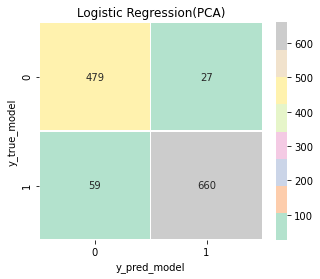

-------------------------------
GaussianNB(PCA)
-------------------------------
Test Score: 0.9379591836734694

Confusion Matrix (Accuracy 0.9404)

       Prediction
Actual   0   1
     0 483  23
     1  50 669

recall Score(y = 0): 0.9545454545454546
recall Score(y = 1): 0.9304589707927677
precision Score(y = 0): 0.9061913696060038
precision Score(y = 1): 0.9667630057803468

Statistics
                     Mean Error (ME)  : 0.022
       Root Mean Squared Error (RMSE) : 0.2441
            Mean Absolute Error (MAE) : 0.0596

Total time: 0.00316256199999998



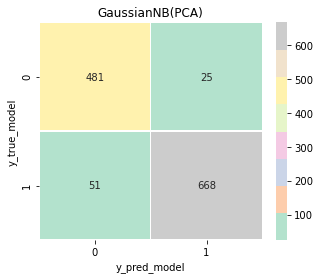

-------------------------------
KNeighbors Classifier(PCA)
-------------------------------
Test Score: 0.9951020408163266

Confusion Matrix (Accuracy 0.9812)

       Prediction
Actual   0   1
     0 494  12
     1  11 708

recall Score(y = 0): 0.9762845849802372
recall Score(y = 1): 0.9847009735744089
precision Score(y = 0): 0.9782178217821782
precision Score(y = 1): 0.9833333333333333

Statistics
                     Mean Error (ME)  : -0.0008
       Root Mean Squared Error (RMSE) : 0.137
            Mean Absolute Error (MAE) : 0.0188

Total time: 0.060705253999998376



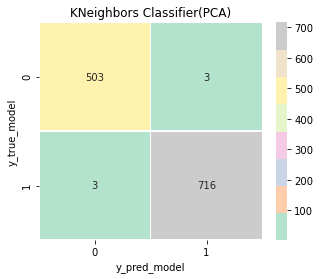

-------------------------------
Decision Tree Classifier(PCA)
-------------------------------
Test Score: 0.9983673469387755

Confusion Matrix (Accuracy 0.9780)

       Prediction
Actual   0   1
     0 495  11
     1  16 703

recall Score(y = 0): 0.9782608695652174
recall Score(y = 1): 0.9777468706536857
precision Score(y = 0): 0.9686888454011742
precision Score(y = 1): 0.9845938375350141

Statistics
                     Mean Error (ME)  : 0.0041
       Root Mean Squared Error (RMSE) : 0.1485
            Mean Absolute Error (MAE) : 0.022

Total time: 0.0038159570000004805



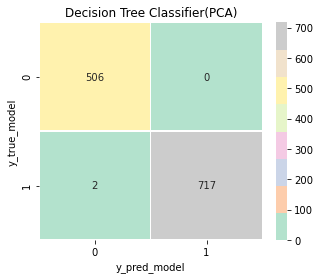

-------------------------------
Random Forest Classifier(PCA)
-------------------------------
Test Score: 0.9975510204081632

Confusion Matrix (Accuracy 0.9886)

       Prediction
Actual   0   1
     0 500   6
     1   8 711

recall Score(y = 0): 0.9881422924901185
recall Score(y = 1): 0.9888734353268428
precision Score(y = 0): 0.984251968503937
precision Score(y = 1): 0.9916317991631799

Statistics
                     Mean Error (ME)  : 0.0016
       Root Mean Squared Error (RMSE) : 0.1069
            Mean Absolute Error (MAE) : 0.0114

Total time: 0.029026445999999595



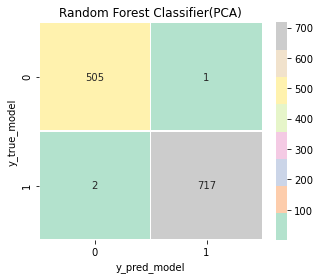

-------------------------------
Gradient Boosting Classifier(PCA)
-------------------------------
Test Score: 0.9942857142857143

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual   0   1
     0 497   9
     1  13 706

recall Score(y = 0): 0.9822134387351779
recall Score(y = 1): 0.9819193324061196
precision Score(y = 0): 0.9745098039215686
precision Score(y = 1): 0.9874125874125874

Statistics
                     Mean Error (ME)  : 0.0033
       Root Mean Squared Error (RMSE) : 0.134
            Mean Absolute Error (MAE) : 0.018

Total time: 0.007894399000001329



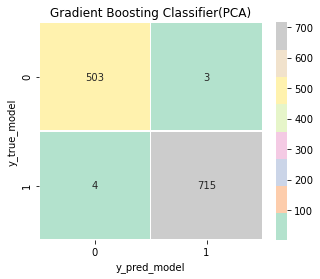

-------------------------------
Support Vector Classifier(PCA)
-------------------------------
Test Score: 0.9951020408163266

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual   0   1
     0 489  17
     1   5 714

recall Score(y = 0): 0.9664031620553359
recall Score(y = 1): 0.9930458970792768
precision Score(y = 0): 0.9898785425101214
precision Score(y = 1): 0.9767441860465116

Statistics
                     Mean Error (ME)  : -0.0098
       Root Mean Squared Error (RMSE) : 0.134
            Mean Absolute Error (MAE) : 0.018

Total time: 0.013385577999997622



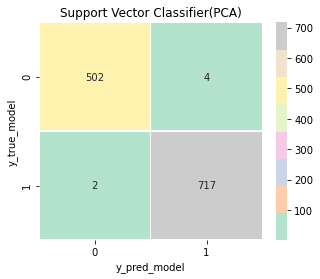

In [38]:
i=0
for model in models:
    print("-------------------------------")
    print(model_name[i])
    print("-------------------------------")
    v = get_model_data(xTest,yTest,model,model_name[i])
    table_vector.append(v)
    y_pred_model = model.predict(xTest)
    cm = confusion_matrix(yTest, y_pred_model)
    f, ax = plt.subplots(figsize =(5,4))
    sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_model")
    plt.ylabel("y_true_model")
    plt.title(model_name[i])
    plt.show()
    i=i+1

In [39]:
results1 = pd.DataFrame(data=table_vector,columns=['Model','Test Score','Recall(0)',
              'Recall(1)','Precision(0)','Precision(1)','ME','RMSE','MAE','Time'])
results1.index += 1
results1[['Model','Test Score',
         'Recall(0)','Recall(1)',
         'Precision(0)','Precision(1)',
         'MAE','RMSE','Time']]


,Model,Test Score,Recall(0),Recall(1),Precision(0),Precision(1),MAE,RMSE,Time
1,Logistic Regression,0.991,0.979,0.984,0.975,0.986,0.0180,0.1340,0.003
2,GaussianNB,0.965,0.912,0.972,0.955,0.943,0.0522,0.2286,0.002
3,KNeighbors Classifier,0.998,0.990,0.999,0.998,0.993,0.0049,0.0700,0.146
4,Decision Tree Classifier,1.000,0.994,0.997,0.996,0.996,0.0041,0.0639,0.001
5,Random Forest Classifier,1.000,0.996,0.997,0.996,0.997,0.0033,0.0571,0.026
6,Gradient Boosting Classifier,1.000,0.996,0.992,0.988,0.997,0.0065,0.0808,0.005
7,Support Vector Classifier,0.999,0.992,0.996,0.994,0.995,0.0057,0.0756,0.018
8,Logistic Regression(PCA),0.930,0.939,0.925,0.898,0.955,0.0694,0.2634,0.003
9,GaussianNB(PCA),0.938,0.955,0.930,0.906,0.967,0.0596,0.2441,0.003
10,KNeighbors Classifier(PCA),0.995,0.976,0.985,0.978,0.983,0.0188,0.1370,0.061


<function matplotlib.pyplot.show(close=None, block=None)>

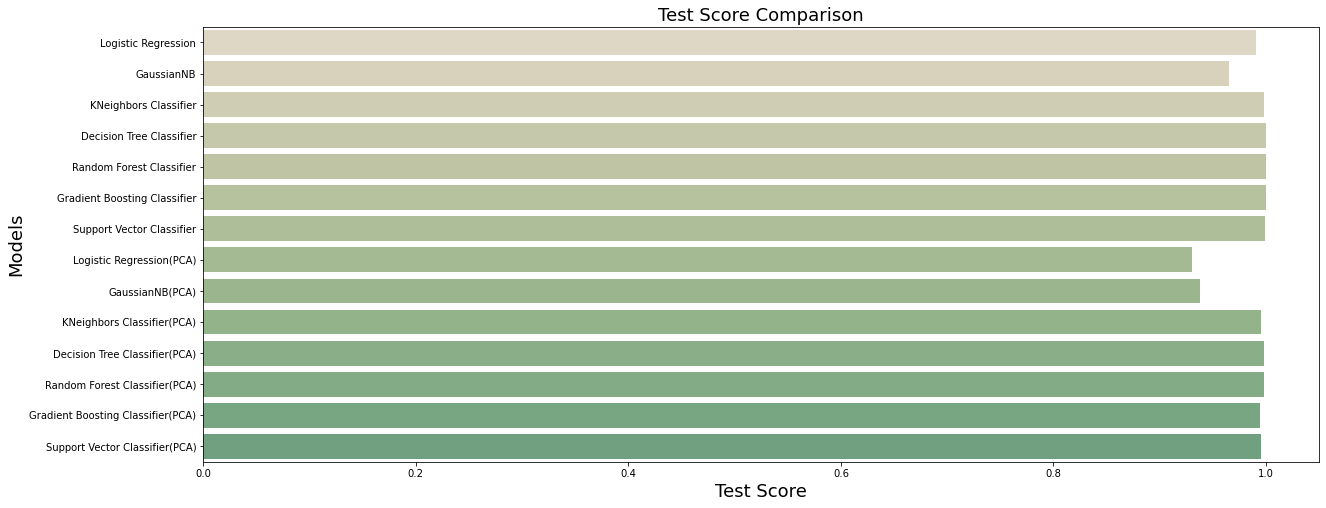

In [40]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x = 'Test Score',y= 'Model', data=results1, palette = sns.cubehelix_palette(len('Coefficient of determination(R^2)'), start=.5, rot=-.85))
plt.xlabel("Test Score", fontsize = 18)
plt.ylabel("Models", fontsize = 18)
plt.title("Test Score Comparison", fontsize = 18)
plt.show

## Feature Importances

Text(0.5, 0, 'Decision Tree Feature Importance')

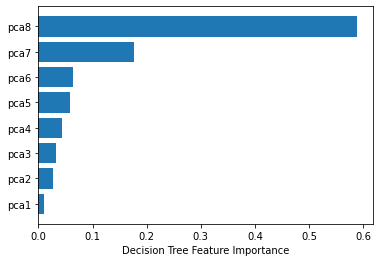

In [41]:
tree.feature_importances_
sorted_idx = tree.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), tree.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

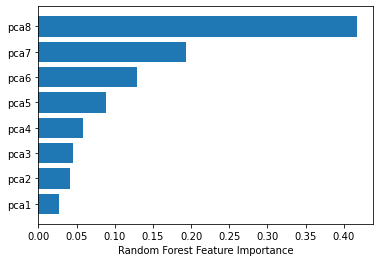

In [42]:
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Gradient Boosting Feature Importance')

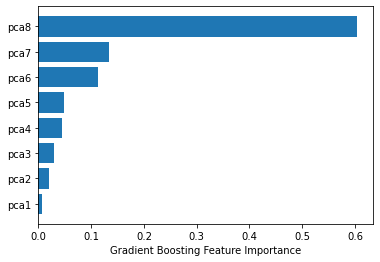

In [43]:
gbmc.feature_importances_
sorted_idx = gbmc.feature_importances_.argsort()
plt.barh(xPCA.columns.tolist(), gbmc.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 6 Unseen Data

In [44]:
new_ms = pd.read_csv("new_mushroom.csv")
new_ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
new_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1999 non-null   object
 1   cap-shape                 1999 non-null   object
 2   cap-surface               1999 non-null   object
 3   cap-color                 1999 non-null   object
 4   bruises                   1999 non-null   object
 5   odor                      1999 non-null   object
 6   gill-attachment           1999 non-null   object
 7   gill-spacing              1999 non-null   object
 8   gill-size                 1999 non-null   object
 9   gill-color                1999 non-null   object
 10  stalk-shape               1999 non-null   object
 11  stalk-root                1999 non-null   object
 12  stalk-surface-above-ring  1999 non-null   object
 13  stalk-surface-below-ring  1999 non-null   object
 14  stalk-color-above-ring  

In [46]:
X_unseen = new_ms.iloc[:,1:23]
y_unseen = new_ms.iloc[:,[0]]

In [47]:
le = LabelEncoder() 
for col in X_unseen.columns:
    X_unseen[col] = le.fit_transform(X_unseen[col])
Encoder_y_unseen=LabelEncoder()
y_unseen = Encoder_y_unseen.fit_transform(y_unseen)
X_unseen.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,3,1,2,1,4,0,0,1,2,0,...,2,3,3,0,0,0,2,1,2,4
1,3,1,4,1,0,0,0,0,2,0,...,2,3,3,0,0,0,2,2,1,1
2,0,1,3,1,2,0,0,0,3,0,...,2,3,3,0,0,0,2,2,1,2
3,3,2,3,1,4,0,0,1,3,0,...,2,3,3,0,0,0,2,1,2,4
4,3,1,1,0,3,0,1,0,2,1,...,2,3,3,0,0,0,0,2,0,1


In [48]:
print(X_unseen.shape)
print(y_unseen.shape)

(1999, 22)
(1999,)


## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_unseen, y_unseen, test_size=0.2, random_state=40)

In [50]:
models=[("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Gradient Boostin", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results_unseen = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results_unseen.mean():.4f}\x1b[0m ± {results_unseen.std():.4f}")

Logistic Regression: 0.9994 ± 0.0019
Decision Tree: 0.9994 ± 0.0019
Random Forest: 0.9994 ± 0.0019
Gradient Boostin: 0.9994 ± 0.0019
KNeighbors: 0.9994 ± 0.0019
SVM: 0.9994 ± 0.0019
Naive Bayes: 0.9994 ± 0.0019


## Test Unseen Data by using the best model (Random Forest)

-------------------------------
Random Forest Classifier(Best Model)
-------------------------------
Test Score: 1.0

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 360   0
     1   0  40

recall Score(y = 0): 1.0
recall Score(y = 1): 1.0
precision Score(y = 0): 1.0
precision Score(y = 1): 1.0

Statistics
                     Mean Error (ME)  : 0.0
       Root Mean Squared Error (RMSE) : 0.0
            Mean Absolute Error (MAE) : 0.0

Total time: 0.012158997000000227



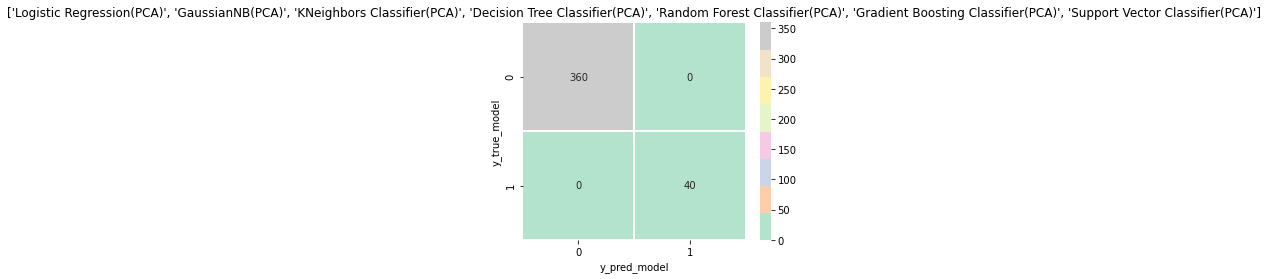

In [51]:
print("-------------------------------")
print("Random Forest Classifier(Best Model)")
print("-------------------------------")

rfc_unseen = RandomForestClassifier(n_estimators=100, random_state=42,verbose=False).fit(X_train1, y_train1)
startTime = perf_counter()
a = rfc_unseen.score(X_test1,y_test1)
print("Test Score:", a)

endTime = perf_counter()
print()

y_pred = cross_val_predict(rfc_unseen, X_test1, y_test1, cv=10)
classificationSummary(y_test1, y_pred)
print()

rs = recall_score(y_test1, y_pred,average=None)
print("recall Score(y = 0):",rs[0])
print("recall Score(y = 1):",rs[1])
ps = precision_score(y_test1, y_pred,average=None)
print("precision Score(y = 0):",ps[0])
print("precision Score(y = 1):",ps[1])

b = round(np.mean(y_test1-y_pred),4)
c = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)),4)
d = round(metrics.mean_absolute_error(y_test1, y_pred),4)

print()
print('Statistics')
print('                     Mean Error (ME)  :',b)
print('       Root Mean Squared Error (RMSE) :',c)
print('            Mean Absolute Error (MAE) :',d)

print()
time = endTime-startTime
print("Total time:",time)
print()

y_pred_model = rfc_unseen.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred_model)
f, ax = plt.subplots(figsize =(5,4))
sns.heatmap(cm,annot = True,cmap="Pastel2",linewidths=0.5,fmt = ".0f",ax=ax)
plt.xlabel("y_pred_model")
plt.ylabel("y_true_model")
plt.title(model_name)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

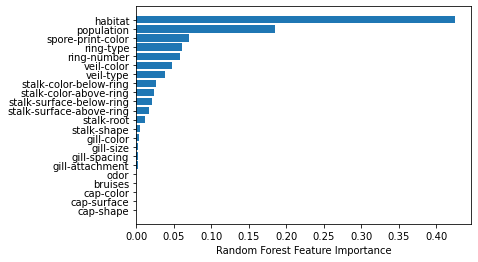

In [52]:
rfc_unseen.feature_importances_
sorted_idx = rfc_unseen.feature_importances_.argsort()
plt.barh(df.columns.tolist(), rfc_unseen.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")